In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Training, evaluation, and inference work exactly in the same way for models built using the functional API as for <b>Sequential</b> models.

The <b>Model</b> class offers a built-in training loop (the fit() method) and a built-in evaluation loop (the <b>evaluate() </b> method).

## Digit Recognitin: MNIST

In [8]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [12]:
x_train=x_train.reshape(60000,784).astype('float32')/255.0
x_test=x_test.reshape(10000,784).astype('float32')/255.0

In [13]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Define CNN Model

In [16]:
inputs=keras.Input(shape=(784,))
dense=layers.Dense(64,activation='relu')
x=dense(inputs)
x=layers.Dense(64,activation='relu')(x)
outputs=layers.Dense(10)(x)

In [17]:
model=keras.Model(inputs=inputs,outputs=outputs,name='mnist_model')

In [18]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


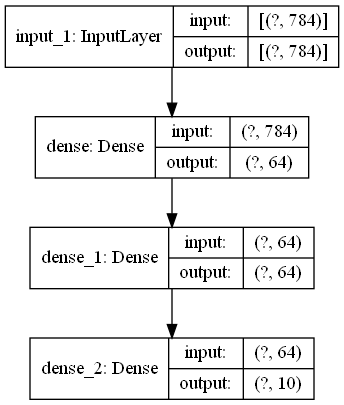

In [19]:
keras.utils.plot_model(model,'MNIST_model_with_shape_info.png',show_shapes=True)

## Compile and Train Model

In [20]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer=keras.optimizers.RMSprop(),
             metrics=['accuracy'])

In [21]:
history=model.fit(x_train,y_train,batch_size=64,epochs=10,validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 1s 2ms/step - loss: 0.3522 - accuracy: 0.8992 - val_loss: 0.1801 - val_accuracy: 0.9479s: 0.3875 - accuracy: 0.88 - ETA: 0s - loss: 0.3764 - accuracy: 
Epoch 2/10
750/750 [==============================] - 1s 1ms/step - loss: 0.1646 - accuracy: 0.9513 - val_loss: 0.1397 - val_accuracy: 0.95900s - loss: 0.1705 - accuracy
Epoch 3/10
750/750 [==============================] - 1s 1ms/step - loss: 0.1207 - accuracy: 0.9643 - val_loss: 0.1254 - val_accuracy: 0.9633
Epoch 4/10
750/750 [==============================] - 1s 1ms/step - loss: 0.0951 - accuracy: 0.9711 - val_loss: 0.1147 - val_accuracy: 0.9660
Epoch 5/10
750/750 [==============================] - 1s 1ms/step - loss: 0.0789 - accuracy: 0.9765 - val_loss: 0.1073 - val_accuracy: 0.9698
Epoch 6/10
750/750 [==============================] - 1s 1ms/step - loss: 0.0673 - accuracy: 0.9796 - val_loss: 0.1016 - val_accuracy: 0.9708
Epoch 7/10
750/750 [==============================] - 1s

## Evaludation Model

In [23]:
test_loss,test_score=model.evaluate(x_test,y_test)
print('Loss: ',test_loss)
print('Score: ',test_score)

313/313 [==============================] - 0s 671us/step - loss: 0.1112 - accuracy: 0.9730
Loss:  0.1111631840467453
Score:  0.9729999899864197


## Save and Serialize
Saving the model and serialization work the same way for models built using the functional API as they do for Sequential models. The standard way to save a functional model is to call model.save() to save the entire model as a single file. You can later recreate the same model from this file, even if the code that built the model is no longer available.

This saved file includes the: - model architecture - model weight values (that were learned during training) - model training config, if any (as passed to compile) - optimizer and its state, if any (to restart training where you left off)

In [27]:
import time
t=time.time()
model_path='Saved Model/CNN_{}'.format(int(t))
print(model_path)

Saved Model/CNN_1620463739


In [29]:
model.save(model_path)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Saved Model/CNN_1620463739\assets


## Load Saved Model

In [31]:
reload_model=keras.models.load_model(model_path)
reload_model.